In [ ]:
##  drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## drive excel파일 read
import pandas as pd
df_origin = pd.read_excel("/content/drive/MyDrive/데이터마이닝 공유 폴더/excel/day1_forclassfication.xlsx")
#################################

In [ ]:
################

## df_origin -> df
df=df_origin

In [ ]:
df = df[df['next_trending'].notnull()] ## 조회수가 없는 관측치(결측치) 제거

In [ ]:
df[0:100].isnull().sum() ## 결측치 확인

views                  0
time_differ            0
next_trending          0
subscriberNum          0
daysfrom_created       0
                      ..
t_yester_weather_흐림    0
y_finedust_나쁨          0
y_finedust_매우나쁨        0
y_finedust_보통          0
y_finedust_좋음          0
Length: 103, dtype: int64

In [ ]:
### 변수 일부만 선택(분류)
df=df[[  "next_trending",'views','time_differ','question_mark', 'exclamation_mark','category_id',  'publish_hour', 'publish_day',
        'subscriberNum', 'daysfrom_created', 'daysfrom_publish',  't_yester_weather','y_finedust']]
       
# ### 변수 일부만 선택
# df=df[[ 'view_growth', 'views','time_differ', 'question_mark', 'exclamation_mark','category_id','publish_hour', 'publish_day',
#        'ratings_disabled', 'subscriberNum', 'daysfrom_created', 'daysfrom_publish', 't_yester_weather','y_finedust']]]


      #'view_growth', #,#,#'dailyviews', 'view_growth_ratio',,'first_view',  'publish_weather', 'publish_finedust', 



## 모델 제외변수
#  
#        '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 
#        '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
#        '평균 전운량(1/10)', 'publish_date','t_1시간 최다일사량(MJ/m2)', 't_합계 일사량(MJ/m2)', 't_일 최심신적설(cm)',
#      't_일 최심적설(cm)', 't_평균 전운량(1/10)',
#  't_yester_pm2.5', 't_미세먼지', 't_초미세먼지', 't_평균기온(°C)', 't_강수 계속시간(hr)',
#        't_10분 최다 강수량(mm)', 't_1시간 최다강수량(mm)','t_yester_pm10', 
# 'publish_pm2.5','publish_pm10', 
# 'created_date', 'Trending_date', '평균기온(°C)','t_일강수량(mm)', '일강수량(mm)','created_year', 'created_month', 'video_order',



# ### 전체변수로 모델 구축시
# df=df[[ 'views','view_growth', #,#,#'dailyviews', 'view_growth_ratio',,'first_view',
#         'Trending_year', 'Trending_month', 
#        'Trending_date', 'time_differ', 
#         'video_order', 'question_mark', 'exclamation_mark',
#        'category_id', 'publish_year',
#        'publish_month', 'publish_date', 'publish_hour', 'publish_day',
#        'ratings_disabled', '평균기온(°C)',
#        '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)',
#        '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
#        '평균 전운량(1/10)', 'subscriberNum', 'created_year', 'created_month',
#        'created_date',  'daysfrom_created', 'daysfrom_publish',
#        'publish_pm10',  'publish_weather', 'publish_pm2.5',
#        'publish_finedust', 't_yester_pm10', 't_yester_weather',
#        't_yester_pm2.5', 't_미세먼지', 't_초미세먼지', 't_평균기온(°C)', 't_강수 계속시간(hr)',
#        't_10분 최다 강수량(mm)', 't_1시간 최다강수량(mm)', 't_일강수량(mm)',
#        't_1시간 최다일사량(MJ/m2)', 't_합계 일사량(MJ/m2)', 't_일 최심신적설(cm)',
#        't_일 최심적설(cm)', 't_평균 전운량(1/10)', 'y_finedust']]

In [ ]:
#########dummy varaibles로 변환


df= pd.get_dummies(df, columns=[#'view_growth_ratio','views','dailyviews',       'publish_weather', 'publish_finedust',

        'question_mark', 'exclamation_mark',
       'category_id',   'publish_hour', 'publish_day',
       't_yester_weather', 'y_finedust'
       ]) ## category????

## 모델 제외변수
#'publish_date','Trending_date', 'created_date', 'video_order', 'created_month','created_year', 


## 전체 변수로 모델 구축시


# df= pd.get_dummies(df, columns=[#'view_growth_ratio','views','dailyviews',
#        'Trending_year', 'Trending_month', 
#        'Trending_date', 
#         'video_order', 'question_mark', 'exclamation_mark',
#        'category_id', 'publish_year',
#        'publish_month', 'publish_date', 'publish_hour', 'publish_day',
#        'ratings_disabled','created_year', 'created_month',
#        'created_date', 'publish_weather', 
#        'publish_finedust',  't_yester_weather', 'y_finedust'
#        ]) ## category????


In [ ]:
### train, test set 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["next_trending"],axis=1), df["next_trending"],test_size=0.3, random_state=12)

In [ ]:
### random forest classifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.metrics import f1_score


model = RandomForestClassifier(n_estimators=1000,max_features=50, max_depth=10, min_samples_leaf=3)
# 변수 전체 모델 학습시 max_features=100, max_depth=1000,  min_samples_split=20


##########모델 학습
with tf.device('/device:GPU:0'):
  model.fit(x_train, y_train)



##########모델 검증
print("train model :" ,model.score(x_train, y_train)) 
print("test model :", model.score(x_test, y_test)) 





# 모델 테스트
y_pred = model.predict(x_test)

print("accuracy score :" ,accuracy_score(y_test, y_pred)) 
print("f1 score : ",f1_score(y_test, y_pred))

train model : 0.842761934283943
test model : 0.7645995299222563
accuracy score : 0.7645995299222563
f1 score :  0.8563864990072798


In [ ]:
print("randomforest_score")
print("accuracy_score : ",accuracy_score(y_test, y_pred))
print("precision_score: ",precision_score(y_test, y_pred))
# print("recall_score   : ",recall_score(y_test, y_pred))
print("f1_score       : ", f1_score(y_test, y_pred))

randomforest_score
accuracy_score :  0.7645995299222563
precision_score:  0.7736149860502192
f1_score       :  0.8563864990072798


In [ ]:
import joblib

joblib.dump(model, "classification_randomforest.joblib")

In [ ]:
# XGboost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score


xgb = XGBClassifier(n_estimators=1000, learning_rate=0.005, max_depth=2,objective='reg:squarederror') 
## tree_method = "gpu_hist"

x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values


# with tf.device('/device:GPU:0'):
  # 모델 훈련

model=xgb.fit(x_train, y_train) 


print("train model :" ,model.score(x_train, y_train)) 
print("test model :", model.score(x_test, y_test)) 

# 모델 예측
y_pred = model.predict(x_test)

print("accuracy score :" ,accuracy_score(y_test, y_pred)) 
print("f1 score : ",f1_score(y_test, y_pred))

# train model : 0.7567420954742715
# test model : 0.7419996384017357
# accuracy score : 0.7419996384017357
# f1 score :  0.848046001490789

In [ ]:
print(model.predict_proba(a)[0][1])

0.7889397


In [ ]:
import numpy as np
a=([[142320.0 ,
0,  #105441.0 
1.5812500000029104 ,
0.0 ,
0.0 ,
125000.0 ,
2798.41875 ,
1.58125000000291 ,
4.7 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
1.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0  ]])

In [ ]:
import joblib

joblib.dump(model, "classification_xgboost.joblib")

['classification_xgboost.joblib']

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(labels, predictions)
print(conf_mat)

In [ ]:
import numpy as np
a=np.array([[142320.0 ,
1.5812500000029104 ,
1.0 ,
125000.0 ,
2798.41875 ,
1.58125000000291 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
1.0 ,
0.0 ,
0.0 ,
0.0   ]])

In [ ]:
print(model.predict_proba([a]))

[[0.26671137 0.73328863]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

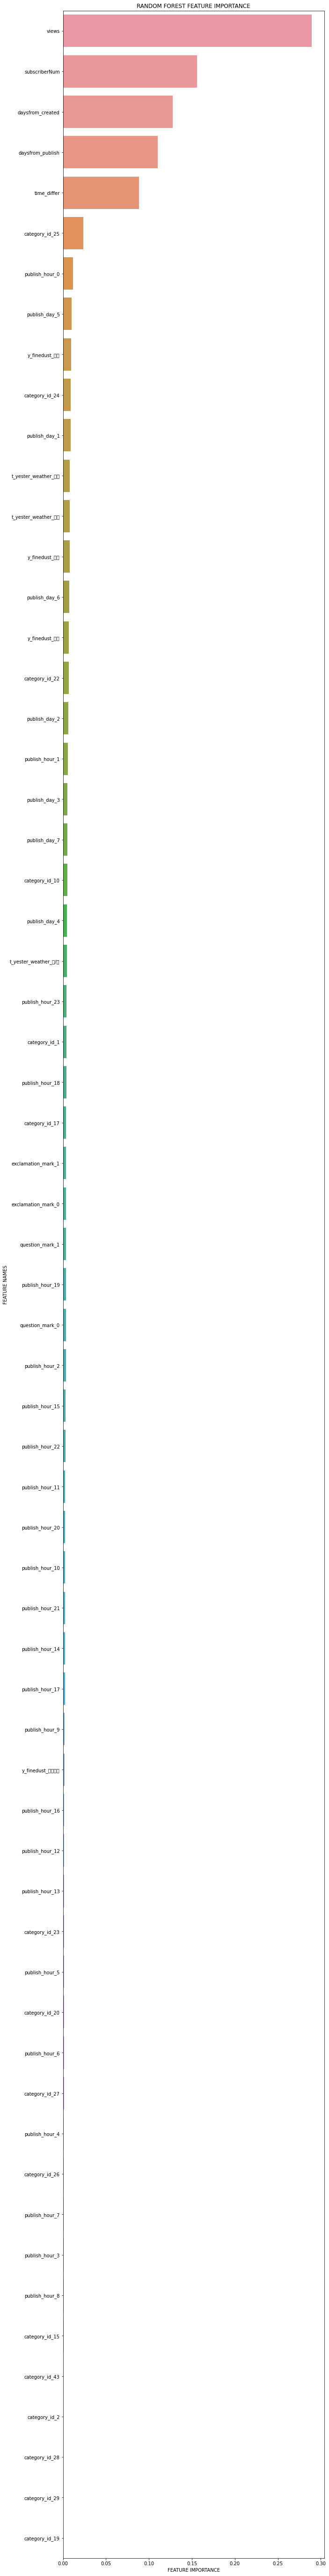

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,100))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.feature_importances_,x_train.columns,'RANDOM FOREST')